# 0 . 한글준비
* matplotlib, seaborn은 한글을 기본 제공하지 않습니다.  번거롭지만 아래 절차를 통해 한글 폰트 설치 및 인식 단계가 필요합니다. 

In [ ]:
# 0.1 폰트 설치 linux 명령 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,633 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

런타임 다시 시작
  #0.2 런타임 - 런타임 다시시작 (또는 Ctrl-M) 으로 재기동

In [ ]:
# 0.3 런타임 다시시작 후 폰트 설정 수행
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumBarunGothic'

#1 . 문제정의 

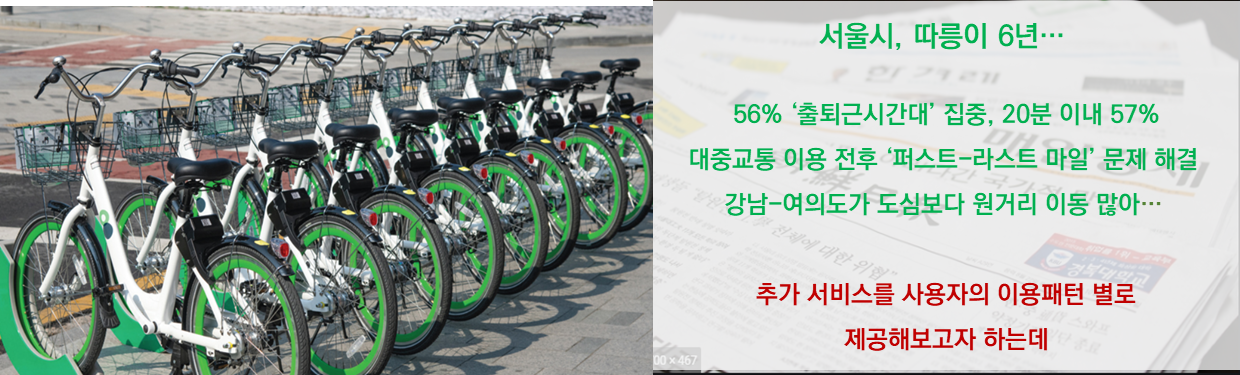

크게 이용패턴은 교통수단과 레저로 구분해 볼 수 있을 것 같다. 우선 다음과 같은 실태를 파악하여 가설을 수립해보고자 한다. 
>가설 수립을 위한 기초 분석
* 남성과 여성의 사용자 패턴에 차이가 있을까? (이용시간대, 이용지역)
* 연령대 별 사용자 패턴에 차이가 있을까? (이용시간대, 이용지역)
* 주중과 주말의 사용자 패턴에 차이가 있을까? (이용시간대, 이용지역)

이용패턴을 서울 열린데이터광장에서 제공하는 데이터를 이용해서 분석해보자.
>이러한 특징을 상세하게 구분하기위해서는 다음의 자료가 필요하다.
* 이용시간대
* 평일/휴일 구분
* 연령대
* 성별
* 대여장소

아래 그림에서 '대여이력'과 '대여소정보'를 이용하여 다음을 분석한다. 
3. 성별/연령대별 이용현황
4. 시간축에 따른 이용현황 관찰
5. 연령대/성별을 감안한 시간축 이용현황 관찰
6. 평일/휴일 이용장소 분석
7. 성별/연령대별 이용지역 파악

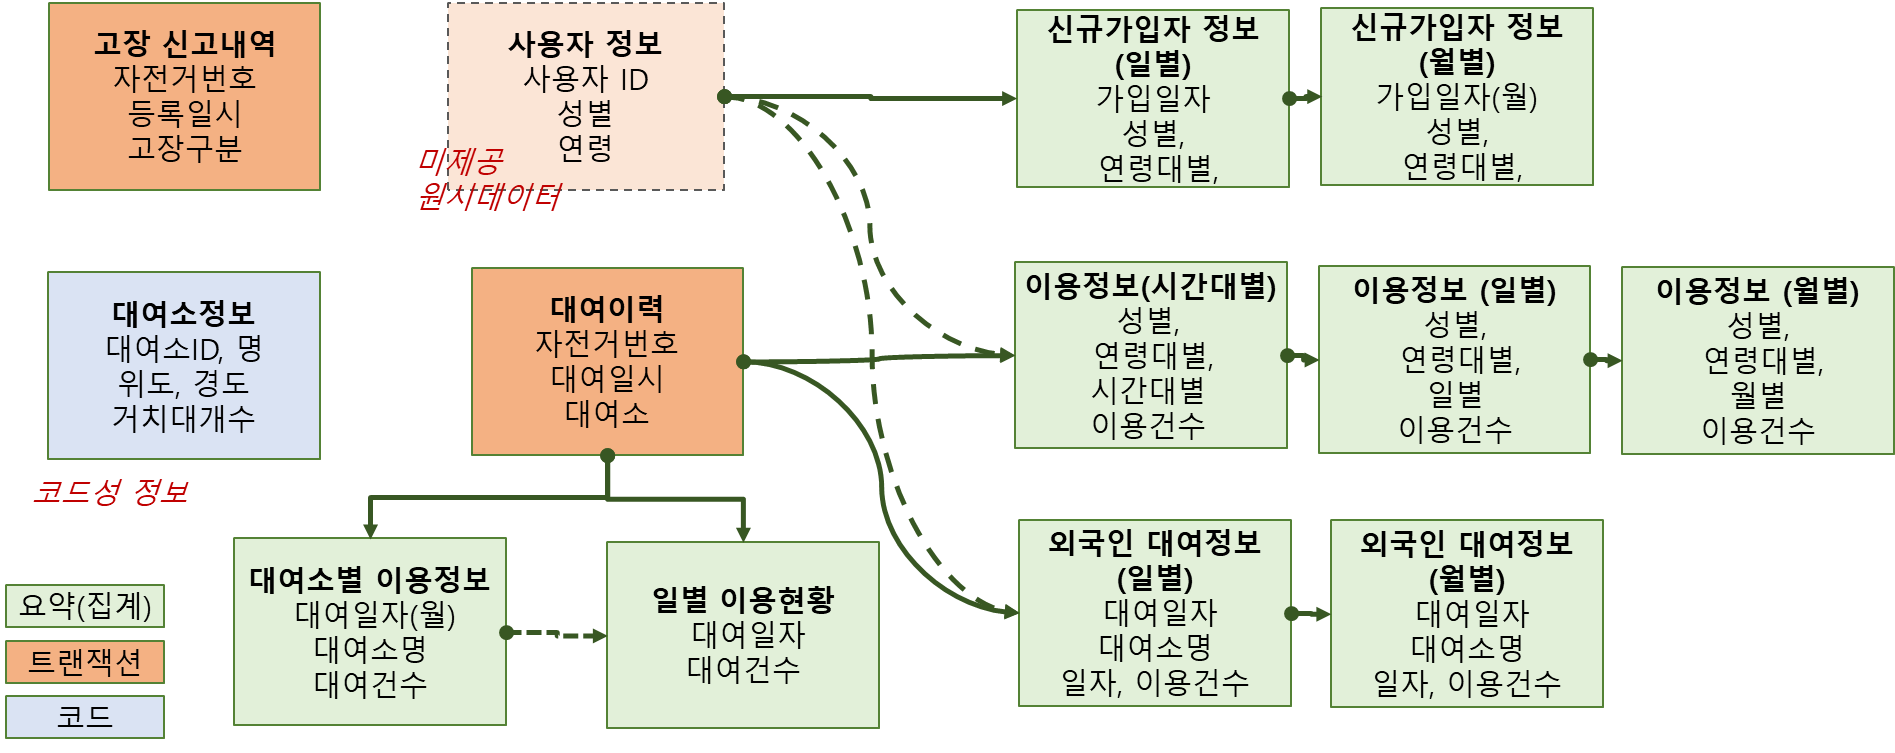

# 2 . 데이터 준비

* 서울시 공공자전거 대여이력 정보:
http://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do

* 서울시 따릉이대여소 마스터 정보:http://data.seoul.go.kr/dataList/OA-21235/S/1/datasetView.do


In [ ]:
# 2.1 G 드라이브에 해당 파일을 다운로드 받아 이를 적재하여 사용한다. *** 개인별 경로는 재지정 필요 ***
# 본 예제에서는 운동으로 자전거 타기 좋은 2022년 10월 정보를 분석한다. 

import pandas as pd
bike_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/90.data/서울특별시 공공자전거 대여이력 정보_2210.csv",
                       encoding = 'cp949', parse_dates=['대여일시','반납일시'],
                       na_values = ['\\N'])
bike_code = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/90.data/서울시 따릉이대여소 마스터 정보.csv",
                        encoding = 'cp949')
bike_raw.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-56517,2022-10-01 00:00:26,4802,새우개마을,0,2022-10-01 00:00:35,4802.0,새우개마을,0.0,0,0.0,2004.0,M,내국인,ST-2628,ST-2628
1,SPB-32505,2022-10-01 00:00:39,4557,리버뷰신안인스빌2차 후문,0,2022-10-01 00:00:57,4557.0,리버뷰신안인스빌2차 후문,0.0,0,0.0,1997.0,NaN,내국인,ST-2564,ST-2564
2,SPB-62175,2022-10-01 00:00:37,791,현대하이페리온,0,2022-10-01 00:01:02,791.0,현대하이페리온,0.0,0,0.0,1991.0,F,내국인,ST-2016,ST-2016
3,SPB-34949,2022-10-01 00:01:02,1946,구로역 광장,0,2022-10-01 00:01:10,1946.0,구로역 광장,0.0,0,0.0,1993.0,M,내국인,ST-873,ST-873
4,SPB-53193,2022-10-01 00:00:15,5056,"마곡역4,5번출구",0,2022-10-01 00:01:11,5055.0,마곡역5번출구앞,0.0,0,0.0,1973.0,M,내국인,ST-2885,ST-2884


In [ ]:
# 2.2 데이터 전처리 및 필요컬럼의 추가
# 클렌징 : 성별 대소문자
# 추가 컬럼 : (시간대 관련) 휴일구분, 요일, 일자, 시간대, 일자요일
#            (사용자 특성 관련) 연령, 연령대

# 클랜징 :  성별 대소문자 정리
bike_raw.성별.mask(bike_raw.성별=='m','M', inplace = True)
bike_raw.성별.mask(bike_raw.성별=='f','F', inplace = True)

# (시간대 관련)
# bike_raw에 새로운 컬럼인 '요일'을 추가한다.
요일 = ['월','화','수','목','금','토','일']
bike_raw['요일'] = bike_raw['대여일시'].dt.dayofweek.apply(lambda x: 요일[x])

# 일자 컬럼 추가 (일자요일)
bike_raw['일자'] = bike_raw['대여일시'].dt.day
bike_raw = bike_raw.assign(일자요일=bike_raw['일자'].apply(str) + "("+ bike_raw['요일'].apply(str)+")")

# 평일/휴일공휴일 구분
bike_raw['휴일구분'] = bike_raw['요일'].apply(\
                                lambda x: '평일' if x not in (['토', '일']) else '휴일')
bike_raw['휴일구분'].mask( bike_raw.일자.isin([3,10]), '휴일')  # *** 22년 10월 공휴일

# 시간대 컬럼 추가
bike_raw['대여시간대'] = bike_raw['대여일시'].dt.hour
bike_raw['반납시간대'] = bike_raw['반납일시'].dt.hour

#(사용자특성 관련)
# 연령대
bike_raw['연령'] =bike_raw['생년'].apply(lambda x :2022-x )
bike_raw['연령대'] = bike_raw['연령'] .apply(\
                                      lambda x : str((x//10)*10 )[:2]+'대'  )

bike_raw['연령'] .where(bike_raw['생년'].between(1930.0 ,2020.0), inplace = True)
bike_raw['연령대'] .where(bike_raw['생년'].between(1930.0 ,2020.0), inplace = True)


# 컬럼명 변경 및 사용하지 않는 컬럼 삭제
bike_raw.rename(columns={"이용시간(분)": "이용시간분", "이용거리(M)": "이용거리"}, inplace =True)
bike_raw.drop(['대여 대여소번호','반납대여소번호'], axis='columns', inplace=True)

bike_raw.head().T

,0,1,2,3,4
자전거번호,SPB-56517,SPB-32505,SPB-62175,SPB-34949,SPB-53193
대여일시,2022-10-01 00:00:26,2022-10-01 00:00:39,2022-10-01 00:00:37,2022-10-01 00:01:02,2022-10-01 00:00:15
대여 대여소명,새우개마을,리버뷰신안인스빌2차 후문,현대하이페리온,구로역 광장,"마곡역4,5번출구"
대여거치대,0,0,0,0,0
반납일시,2022-10-01 00:00:35,2022-10-01 00:00:57,2022-10-01 00:01:02,2022-10-01 00:01:10,2022-10-01 00:01:11
반납대여소명,새우개마을,리버뷰신안인스빌2차 후문,현대하이페리온,구로역 광장,마곡역5번출구앞
반납거치대,0.0,0.0,0.0,0.0,0.0
이용시간분,0,0,0,0,0
이용거리,0.0,0.0,0.0,0.0,0.0
생년,2004.0,1997.0,1991.0,1993.0,1973.0


## [데이터] 컬럼정보

In [ ]:
# 2.3 데이터 항목 조회
bike_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617855 entries, 0 to 4617854
Data columns (total 22 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    object        
 1   대여일시     datetime64[ns]
 2   대여 대여소명  object        
 3   대여거치대    int64         
 4   반납일시     datetime64[ns]
 5   반납대여소명   object        
 6   반납거치대    float64       
 7   이용시간분    int64         
 8   이용거리     float64       
 9   생년       float64       
 10  성별       object        
 11  이용자종류    object        
 12  대여대여소ID  object        
 13  반납대여소ID  object        
 14  요일       object        
 15  일자       int64         
 16  일자요일     object        
 17  휴일구분     object        
 18  대여시간대    int64         
 19  반납시간대    int64         
 20  연령       float64       
 21  연령대      object        
dtypes: datetime64[ns](2), float64(4), int64(5), object(11)
memory usage: 775.1+ MB


## [데이터] 기술통계 (양적변수)

In [ ]:
# 2.4 주요 기술통계 지표 확인
pd.options.display.float_format = '{:.1f}'.format
bike_raw.describe(percentiles = [.25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
대여거치대,4617855.0,3.9,19.3,0.0,0.0,0.0,0.0,0.0,0.0,99.0,99.0
반납거치대,4599082.0,3.9,19.3,0.0,0.0,0.0,0.0,0.0,0.0,99.0,99.0
이용시간분,4617855.0,21.2,28.8,0.0,6.0,12.0,26.0,52.0,74.0,116.0,2707.0
이용거리,4617855.0,2408.5,3003.9,0.0,810.0,1450.1,2760.0,5390.0,8073.8,15428.4,133496.9
생년,4232670.0,1988.1,16.2,0.0,1981.0,1992.0,1997.0,2001.0,2004.0,2007.0,2099.0
일자,4617855.0,16.7,8.7,1.0,9.0,17.0,24.0,28.0,30.0,31.0,31.0
대여시간대,4617855.0,14.1,5.7,0.0,10.0,15.0,18.0,21.0,22.0,23.0,23.0
반납시간대,4617855.0,14.2,5.8,0.0,10.0,15.0,19.0,21.0,22.0,23.0,23.0
연령,4208336.0,33.7,11.9,2.0,25.0,30.0,41.0,52.0,57.0,65.0,92.0


,이용시간분,이용거리
0.1,3.0,434.1
0.5,12.0,1450.1
0.9,52.0,5390.0
0.9,74.0,8073.8
1.0,116.0,15428.4


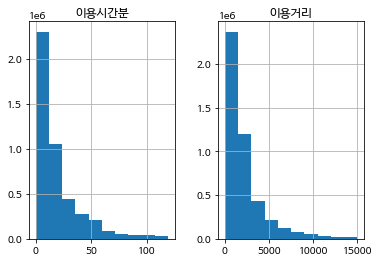

In [ ]:
# 2.5 이용시간, 이용거리 분포 
display(bike_raw[['이용시간분','이용거리']].quantile([.1, .5, .9, .95, .99]))
bike_raw[['이용시간분','이용거리']].query("이용시간분<120 and 이용거리< 15000").hist();

## [데이터] 기술통계 (질적변수)

In [ ]:
# 2.6 질적변수 집계 정보 확인
bike_raw.describe(include = ['object']).T

,count,unique,top,freq
자전거번호,4617855,33800,SPB-60127,417
대여 대여소명,4617855,2676,마곡나루역 2번 출구,18804
반납대여소명,4599082,2685,마곡나루역 2번 출구,18684
성별,3096314,2,M,1861817
이용자종류,4617855,3,내국인,4562480
대여대여소ID,4617855,2679,ST-2031,18804
반납대여소ID,4599082,2688,ST-2031,18684
요일,4617855,7,토,816615
일자요일,4617855,31,7(금),188050
휴일구분,4617855,2,평일,3298718


# 3 . 성별 연령대별 이용현황

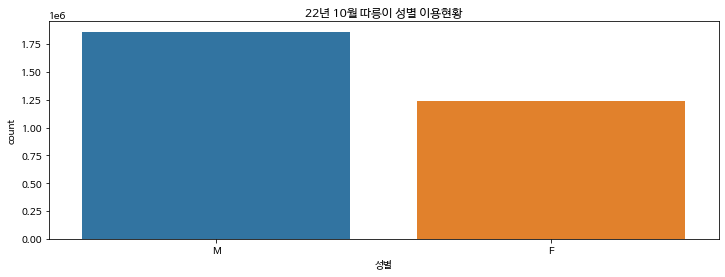

In [ ]:
# 3.1 성별 이용량 현황
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.countplot(x='성별', data=bike_raw)
plt.title("22년 10월 따릉이 성별 이용현황");

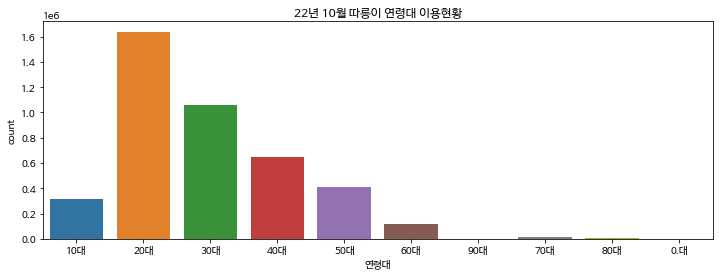

In [ ]:
# 3.2 연령대별 이용량 현황
plt.figure(figsize=(12, 4))
sns.countplot(x='연령대', data=bike_raw)
plt.title("22년 10월 따릉이 연령대 이용현황");

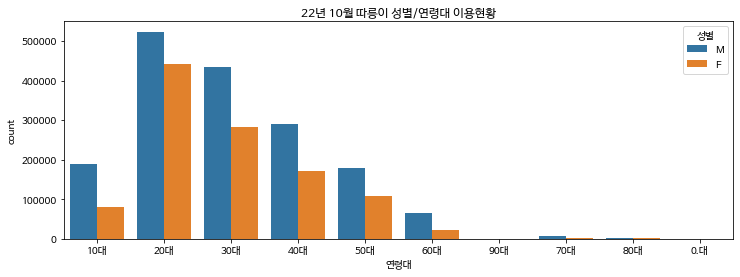

In [ ]:
# 3.3 성별 연령대별 이용량 현황
plt.figure(figsize=(12, 4))
sns.countplot(x='연령대', hue = '성별', data=bike_raw)
plt.title("22년 10월 따릉이 성별/연령대 이용현황");

## [그래프] 성별 연령대별 이용량

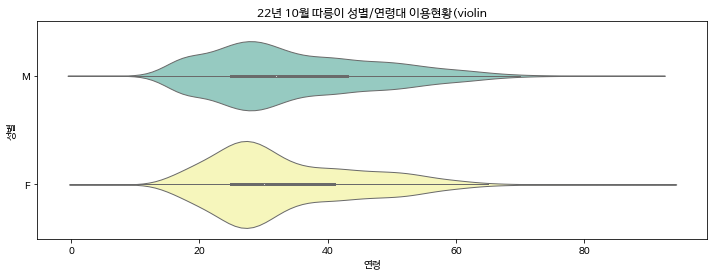

In [ ]:
# 3.4 성별 연령대별 이용량 현황 (violin plot 버전)
plt.figure(figsize=(12, 4))
sns.violinplot(data=bike_raw, y='성별' ,x='연령', palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title("22년 10월 따릉이 성별/연령대 이용현황(violin");

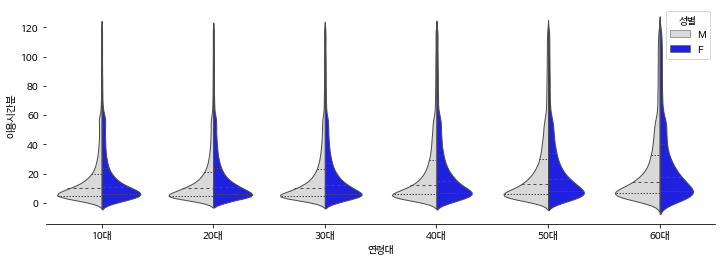

In [ ]:
# 3.5 연령대별 성별 이용시간

plt.figure (figsize = (12,4))

sns.violinplot(data=bike_raw.query("이용시간분<=120 and 연령 < 70 and 연령 > 9"), x="연령대", y="이용시간분", hue="성별",
               split=True, inner="quart", linewidth=1,
               palette={"F": "b", "M": ".85"})
sns.despine(left=True)

# 4 . 시간축에 따른 이용현황 관찰

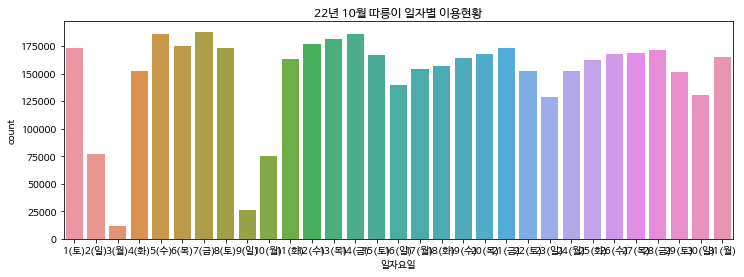

In [ ]:
# 4.1 일자별 이용현황
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.countplot(x='일자요일', data=bike_raw)
plt.title("22년 10월 따릉이 일자별 이용현황");

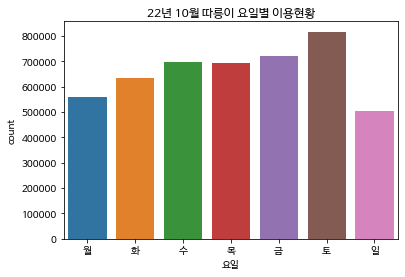

In [ ]:
# 4.2 요일별 이용현황
sns.countplot(x='요일', data=bike_raw, order=['월','화','수','목','금','토','일'])
plt.title("22년 10월 따릉이 요일별 이용현황");

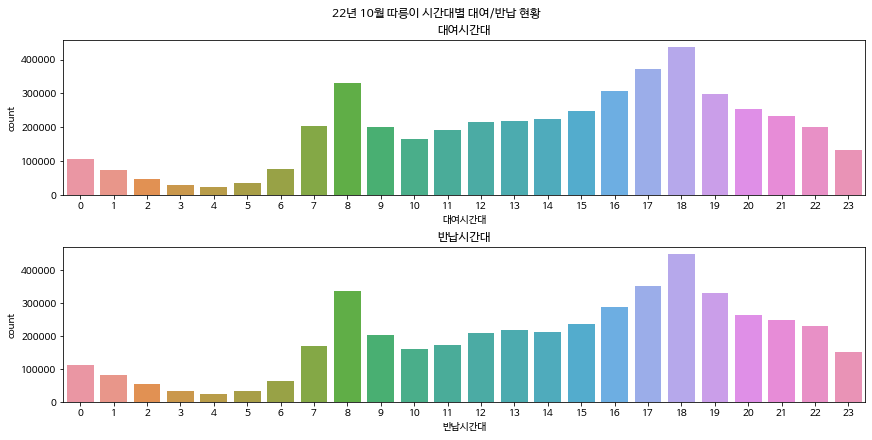

In [ ]:
# 4.3 시간대별 분석 
fig,(ax1, ax2) = plt.subplots(2,figsize=(12, 6), constrained_layout= True)
sns.countplot(x='대여시간대', data=bike_raw, ax=ax1)
sns.countplot(x='반납시간대', data=bike_raw, ax=ax2)
fig.suptitle("22년 10월 따릉이 시간대별 대여/반납 현황")
ax1.set_title("대여시간대")
ax2.set_title("반납시간대");

## [그래프] 평일/휴일 시간대별 이용량

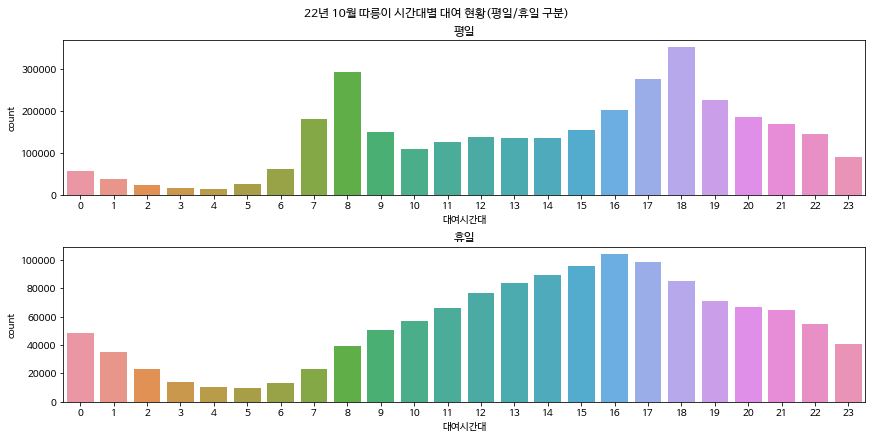

In [ ]:
# 4.4 대여시간대 평일/휴일 구분 시간대 분석 
filter_평일= "휴일구분 == '평일'"
filter_휴일= "휴일구분 == '휴일'"

fig,(ax1, ax2) = plt.subplots(2,figsize=(12, 6), constrained_layout= True)
sns.countplot(x='대여시간대', data=bike_raw.query(filter_평일), ax=ax1)
sns.countplot(x='대여시간대', data=bike_raw.query(filter_휴일), ax=ax2)

fig.suptitle("22년 10월 따릉이 시간대별 대여 현황(평일/휴일 구분)")
ax1.set_title("평일")
ax2.set_title("휴일");

# 5 . 연령 성별을 감안한 시간축 이용현황 관찰

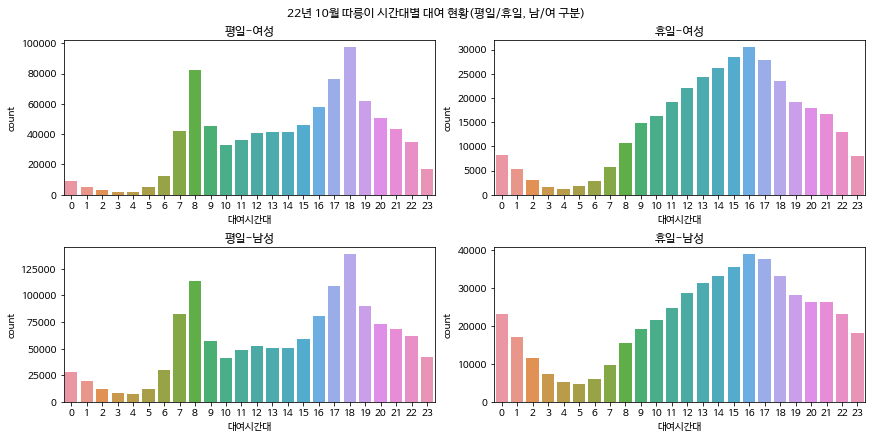

In [ ]:
# 5.1 대여시간대 평일/휴일 별 시간대 분석 
filter_평일= "휴일구분 == '평일'"
filter_휴일= "휴일구분 == '휴일'"
filter_여성= "성별 == 'F'"
filter_남성= "성별 == 'M'"

fig,axs = plt.subplots(2,2,figsize=(12, 6), constrained_layout= True)
sns.countplot(x='대여시간대', data=bike_raw.query(filter_평일 +" and "+filter_여성 ), ax=axs[0][0])
sns.countplot(x='대여시간대', data=bike_raw.query(filter_휴일+" and "+filter_여성), ax=axs[0][1])
sns.countplot(x='대여시간대', data=bike_raw.query(filter_평일 +" and "+filter_남성 ), ax=axs[1][0])
sns.countplot(x='대여시간대', data=bike_raw.query(filter_휴일+" and "+filter_남성), ax=axs[1][1])


fig.suptitle("22년 10월 따릉이 시간대별 대여 현황(평일/휴일, 남/여 구분)")
axs[0][0].set_title("평일-여성")
axs[0][1].set_title("휴일-여성")
axs[1][0].set_title("평일-남성")
axs[1][1].set_title("휴일-남성");

휴일구분    평일                                                           ...  휴일  \
성별       F                                                           ...   M   
연령대    0.대    10대     20대     30대    40대    50대   60대  70대  80대 90대  ... 0.대   
대여시간대                                                                ...       
19    14.0 3732.0 23359.0 15234.0 7503.0 4719.0 938.0 61.0 40.0 NaN  ... 4.0   
20    10.0 3461.0 19927.0 12164.0 5727.0 3544.0 595.0 54.0 69.0 1.0  ... 6.0   
21    12.0 3479.0 18047.0  9985.0 4536.0 2957.0 484.0 56.0 44.0 2.0  ... 4.0   
22    12.0 3893.0 15271.0  6723.0 3151.0 1867.0 275.0 58.0 32.0 2.0  ... 2.0   
23     7.0 1700.0  8353.0  3012.0 1364.0  813.0 174.0 25.0 23.0 NaN  ... 7.0   

휴일구분                                                          
성별                                                            
연령대      10대    20대    30대    40대    50대   60대  70대  80대 90대  
대여시간대                                                         
19    3917.0 9010.0 6564.0 3351.0 1953.0 653.0 38.0 18.0 NaN  
20    3815.0 8584.0 6075.0 3105.0 1734.0 545.0 38.0  7.0 1.0  
21    4217.0 8985.0 5635.0 2805.0 1570.0 485.0 49.0  7.0 NaN  
22    4382.0 8454.0 4595.0 2042.0 1217.0 356.0 25.0  7.0 NaN  
23    3082.0 7116.0 3471.0 1476.0 1033.0 317.0 14.0  6.0 NaN  

[5 rows x 40 columns]

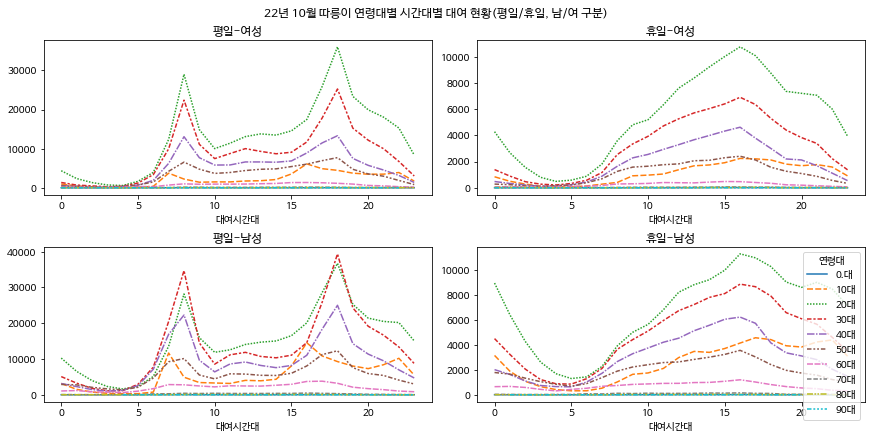

In [ ]:
# 5.2  평일/휴일-성별-연령대별 대여 시간대 분석 

# 평일/휴일-성별-연령대별 대여시간대 집계 (like SQL groupby or Excel Pivot)
bike_demo = bike_raw.groupby(['휴일구분','성별','연령대','대여시간대'])['대여일시'].count()
bike_demo = bike_demo.unstack().T
display(bike_demo.tail())

# 그래프로 출력
fig,axs = plt.subplots(2,2,figsize=(12, 6), constrained_layout= True)
sns.lineplot(data = bike_demo['평일']['F'], ax=axs[0][0], legend= False)
sns.lineplot(data = bike_demo['휴일']['F'], ax=axs[0][1], legend= False)
sns.lineplot(data = bike_demo['평일']['M'], ax=axs[1][0], legend= False)
sns.lineplot(data = bike_demo['휴일']['M'], ax=axs[1][1])

fig.suptitle("22년 10월 따릉이 연령대별 시간대별 대여 현황(평일/휴일, 남/여 구분)")
axs[0][0].set_title("평일-여성")
axs[0][1].set_title("휴일-여성")
axs[1][0].set_title("평일-남성")
axs[1][1].set_title("휴일-남성");

## [그래프] 평일/휴일 남성/여성  연령대별 시간대별 이용량 (해트맵)

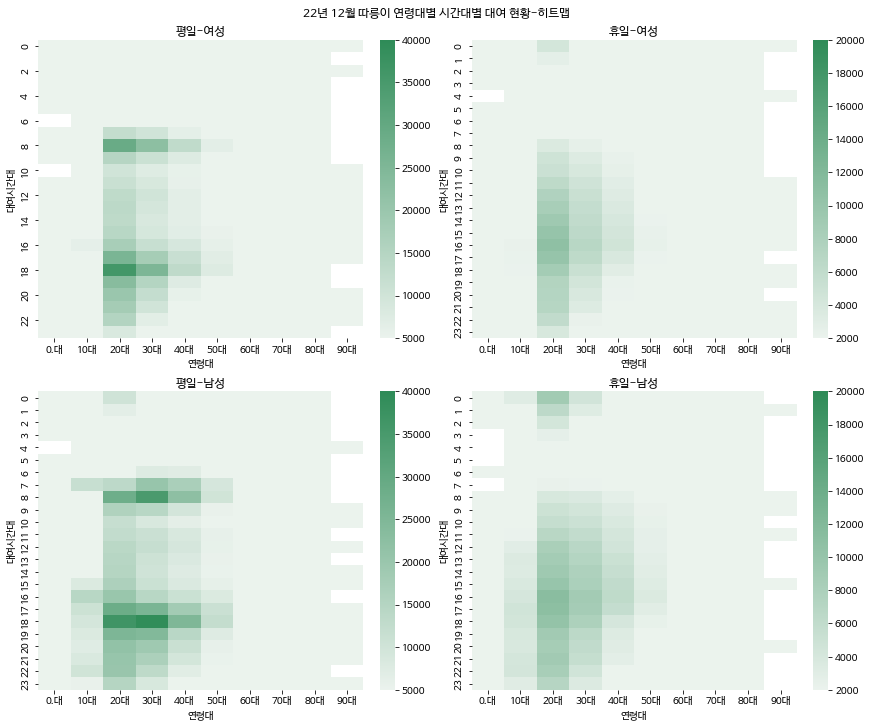

In [ ]:
# 5.3 평일/휴일-성별-연령대별 대여 시간대 분석 (히트맵 버전)

fig,axs = plt.subplots(2,2,figsize=(12, 10), constrained_layout= True)

sns.heatmap(data= bike_demo['평일']['F'], cmap = sns.light_palette("seagreen", as_cmap=True), vmin = 5000 , vmax = 40000, ax=axs[0][0])
sns.heatmap(data= bike_demo['휴일']['F'], cmap = sns.light_palette("seagreen", as_cmap=True), vmin = 2000 , vmax = 20000, ax=axs[0][1])
sns.heatmap(data= bike_demo['평일']['M'], cmap = sns.light_palette("seagreen", as_cmap=True), vmin = 5000 , vmax = 40000, ax=axs[1][0])
sns.heatmap(data= bike_demo['휴일']['M'], cmap = sns.light_palette("seagreen", as_cmap=True), vmin = 2000 , vmax = 20000, ax=axs[1][1])

fig.suptitle("22년 12월 따릉이 연령대별 시간대별 대여 현황-히트맵")
axs[0][0].set_title("평일-여성")
axs[0][1].set_title("휴일-여성")
axs[1][0].set_title("평일-남성")
axs[1][1].set_title("휴일-남성");

# 6 . 평일/휴일 이용장소 분석 
* 평일과 휴일의 이용장소가 다른지,  어떤 특징이 있는지 지도상에 나타내어 관찰해보자.
* 운동 이용을 위해서는 경사지 보다 평지가 애용 될 것이다. 
* 운동 이용을 위해서는 공원 등의 선호가 높을 것이다. 

In [ ]:
# 6.1 대여소 마스터 정보 (주소 및 위도경도정보)
bike_code.tail()

,대여소_ID,주소1,주소2,위도,경도
3203,ST-1002,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.5,126.9
3204,ST-1001,서울특별시 양천구 남부순환로4길20,서서울호수공원,0.0,0.0
3205,ST-1000,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.5,126.9
3206,ST-100,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.5,127.1
3207,ST-10,서울특별시 마포구 양화로 93,427,37.6,126.9


In [ ]:
# 6.2 휴일여부로 대여소별 이용량을 집계 후, 대여소별 위도 경도 정보를 연계

# 집계
bike_station = bike_raw.groupby(['대여대여소ID','대여 대여소명','휴일구분'])['대여일시'].count().unstack().reset_index()  
# 코드 정보 병합
bike_station = pd.merge(bike_station, bike_code, left_on='대여대여소ID', right_on='대여소_ID')
# 불요 항목 삭제 및 이상치 삭제
bike_station.drop(['대여소_ID','주소2'], axis='columns', inplace=True)
bike_station.위도.mask (bike_station.위도 == 0.0, inplace = True)
bike_station.경도.mask (bike_station.경도 == 0.0, inplace = True)

bike_station

,대여대여소ID,대여 대여소명,평일,휴일,주소1,위도,경도
0,ST-10,서교동 사거리,1753.0,737.0,서울특별시 마포구 양화로 93,37.6,126.9
1,ST-1000,서부식자재마트 건너편,1725.0,717.0,서울특별시 양천구 신정동 236,37.5,126.9
2,ST-1002,서울시 도로환경관리센터,2079.0,895.0,서울특별시 양천구 목동동로 316-6,37.5,126.9
3,ST-1003,신월중학교,1147.0,422.0,서울특별시 양천구 화곡로 59,37.5,126.8
4,ST-1004,신정이펜하우스314동,791.0,335.0,서울특별시 양천구 신정이펜1로50,37.5,126.8
...,...,...,...,...,...,...,...
2674,ST-993,경서농협 버스정류장(우리은행신정동지점방향),1317.0,568.0,서울특별시 양천구 신월로 342-1 구두수선대19,37.5,126.9
2675,ST-994,SBS방송국,2403.0,836.0,서울특별시 양천구 목동서로161,37.5,126.9
2676,ST-995,계남공원 입구 주출입구 좌측,390.0,115.0,서울특별시 양천구 신정동 621-14,37.5,126.9
2677,ST-996,양강중학교앞 교차로,810.0,361.0,서울특별시 양천구 남부순환로88길5-16,37.5,126.9


In [ ]:
# 6.3 평일/휴일 이용량 많은 곳 상위 50개를 추출 

평일_top50 = bike_station.nlargest(50, '평일')
print ('평일 Top 10')
display(평일_top50.head(10))

휴일_top50 = bike_station.nlargest(50, '휴일')
print ('휴일 Top 10')
display(휴일_top50.head(10))

평일 Top 10


,대여대여소ID,대여 대여소명,평일,휴일,주소1,위도,경도
949,ST-2031,마곡나루역 2번 출구,14274.0,4530.0,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),37.6,126.8
654,ST-1718,마곡나루역 5번출구 뒤편,9976.0,2058.0,서울특별시 강서구 마곡중앙5로 지하 2,37.6,126.8
2576,ST-891,롯데월드타워(잠실역2번출구 쪽),9340.0,4303.0,서울특별시 송파구 올림픽로 293-19,37.5,127.1
963,ST-2045,마곡나루역 3번 출구,8840.0,2289.0,서울특별시 강서구 마곡동로 115,37.6,126.8
2397,ST-702,봉림교 교통섬,8376.0,4659.0,서울특별시 관악구 신림동 1467-13,37.5,126.9
2365,ST-668,구로디지털단지역 앞,7996.0,2742.0,서울특별시 구로구 시흥대로 577-2,37.5,126.9
2670,ST-99,뚝섬유원지역 1번출구 앞,7984.0,6257.0,서울특별시 광진구 능동로 10,37.5,127.1
2421,ST-73,여의나루역 1번출구 앞,7941.0,5048.0,서울특별시 영등포구 여의동로 지하343,37.5,126.9
61,ST-1065,"발산역 1번, 9번 인근 대여소",7776.0,2843.0,서울특별시 강서구 마곡동 797-5,37.6,126.8
1771,ST-2905,한강공원 망원나들목,7242.0,7219.0,서울특별시 마포구 망원로 1-1 토목과 자재창고,37.6,126.9


휴일 Top 10


,대여대여소ID,대여 대여소명,평일,휴일,주소1,위도,경도
1771,ST-2905,한강공원 망원나들목,7242.0,7219.0,서울특별시 마포구 망원로 1-1 토목과 자재창고,37.6,126.9
2670,ST-99,뚝섬유원지역 1번출구 앞,7984.0,6257.0,서울특별시 광진구 능동로 10,37.5,127.1
2421,ST-73,여의나루역 1번출구 앞,7941.0,5048.0,서울특별시 영등포구 여의동로 지하343,37.5,126.9
2397,ST-702,봉림교 교통섬,8376.0,4659.0,서울특별시 관악구 신림동 1467-13,37.5,126.9
949,ST-2031,마곡나루역 2번 출구,14274.0,4530.0,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),37.6,126.8
2576,ST-891,롯데월드타워(잠실역2번출구 쪽),9340.0,4303.0,서울특별시 송파구 올림픽로 293-19,37.5,127.1
657,ST-1720,올림픽공원역 3번출구,5489.0,3952.0,서울특별시 송파구 양재대로 지하 1233,37.5,127.1
2145,ST-426,당산육갑문,5131.0,3333.0,서울특별시 영등포구 당산로52길 3,37.5,126.9
1818,ST-295,당산역 10번출구 앞,6880.0,2923.0,서울특별시 영등포구 당산로 222 당산디오빌,37.5,126.9
493,ST-1546,신대방역 2번 출구,6750.0,2914.0,서울특별시 관악구 난곡로 367,37.5,126.9


## [Map1] 휴일구분별 인기지역 Top50

In [ ]:
# 6.4 평일/휴일 이용량 많은 곳 상위 50개 지도에 표시
import folium

# Add  points to the map
def add_point( map, df, name_col, size_col=None, size_weight=None, color = 'red' ) :
  for _, row in df.iterrows():
      import folium
      folium.Marker(location = [row['위도'], row['경도']],
            icon=folium.Icon(color=color),
            popup=row[name_col],
      ).add_to(map)
      folium.Circle(location = [row['위도'], row['경도']],
            radius = row[size_col] * size_weight if size_col else 200,
            color=color,
            popup=row[name_col],
      ).add_to(map)

# Draw a basemap
m = folium.Map(location=[37.58, 127.0], tiles='openstreetmap', zoom_start=12)

# Add  points to the map

add_point(m, 휴일_top50, '대여 대여소명', size_col = '휴일', size_weight= 0.1, color = 'red')
add_point(m, 평일_top50, '대여 대여소명', size_col = '평일', size_weight= 0.05, color = 'green')

# Display the map
m


# 7 . 성별/연령대별 이용지역 파악

In [ ]:
# 7.1 성별로 인기지역 다른지 분석

# 성별-휴일구분별 대여소별 이용건수 집계
bike_station_demo = bike_raw.groupby(['대여대여소ID','대여 대여소명','성별','휴일구분'])['대여일시'].count().unstack(['성별','휴일구분']).reset_index()
bike_station_demo.columns = ['대여대여소ID','대여 대여소명','F-평일','F-휴일','M-평일','M-휴일']
bike_station_demo = pd.merge(bike_station_demo, bike_code, left_on='대여대여소ID', right_on='대여소_ID')
bike_station_demo.drop(['대여소_ID','주소2'], axis='columns', inplace=True)
bike_station_demo.위도.mask (bike_station_demo.위도 == 0.0, inplace = True)
bike_station_demo.경도.mask (bike_station_demo.경도 == 0.0, inplace = True)

# 성별 상위 Top 50 추출 
평일_top50_F = bike_station_demo.nlargest(50, 'F-평일')
평일_top50_M = bike_station_demo.nlargest(50, 'M-평일')
휴일_top50_F = bike_station_demo.nlargest(50, 'F-휴일')
휴일_top50_M = bike_station_demo.nlargest(50, 'M-휴일')

# 성별 Top 10 출력
print('평일 여성 Top 10')
display(평일_top50_F.head(10))
print('평일 남성 Top 10')
display(평일_top50_M.head(10))
print('휴일 여성 Top 10')
display(휴일_top50_F.head(10))
print('휴일 남성 Top 10')
display(휴일_top50_M.head(10))

평일 여성 Top 10


,대여대여소ID,대여 대여소명,F-평일,F-휴일,M-평일,M-휴일,주소1,위도,경도
949,ST-2031,마곡나루역 2번 출구,4086.0,1326.0,5295.0,1581.0,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),37.6,126.8
2576,ST-891,롯데월드타워(잠실역2번출구 쪽),2933.0,1369.0,3059.0,1295.0,서울특별시 송파구 올림픽로 293-19,37.5,127.1
654,ST-1718,마곡나루역 5번출구 뒤편,2737.0,551.0,4258.0,836.0,서울특별시 강서구 마곡중앙5로 지하 2,37.6,126.8
2670,ST-99,뚝섬유원지역 1번출구 앞,2617.0,2025.0,2570.0,1971.0,서울특별시 광진구 능동로 10,37.5,127.1
1771,ST-2905,한강공원 망원나들목,2399.0,2527.0,2302.0,2262.0,서울특별시 마포구 망원로 1-1 토목과 자재창고,37.6,126.9
61,ST-1065,"발산역 1번, 9번 인근 대여소",2315.0,797.0,2680.0,1011.0,서울특별시 강서구 마곡동 797-5,37.6,126.8
2397,ST-702,봉림교 교통섬,2237.0,1117.0,3455.0,1982.0,서울특별시 관악구 신림동 1467-13,37.5,126.9
963,ST-2045,마곡나루역 3번 출구,2224.0,635.0,3859.0,872.0,서울특별시 강서구 마곡동로 115,37.6,126.8
614,ST-1681,송파구청,2026.0,922.0,2122.0,893.0,서울특별시 송파구 올림픽로 326 송파구청,37.5,127.1
2365,ST-668,구로디지털단지역 앞,2001.0,609.0,3392.0,1211.0,서울특별시 구로구 시흥대로 577-2,37.5,126.9


평일 남성 Top 10


,대여대여소ID,대여 대여소명,F-평일,F-휴일,M-평일,M-휴일,주소1,위도,경도
949,ST-2031,마곡나루역 2번 출구,4086.0,1326.0,5295.0,1581.0,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),37.6,126.8
654,ST-1718,마곡나루역 5번출구 뒤편,2737.0,551.0,4258.0,836.0,서울특별시 강서구 마곡중앙5로 지하 2,37.6,126.8
963,ST-2045,마곡나루역 3번 출구,2224.0,635.0,3859.0,872.0,서울특별시 강서구 마곡동로 115,37.6,126.8
2397,ST-702,봉림교 교통섬,2237.0,1117.0,3455.0,1982.0,서울특별시 관악구 신림동 1467-13,37.5,126.9
2421,ST-73,여의나루역 1번출구 앞,1871.0,1534.0,3452.0,1717.0,서울특별시 영등포구 여의동로 지하343,37.5,126.9
2365,ST-668,구로디지털단지역 앞,2001.0,609.0,3392.0,1211.0,서울특별시 구로구 시흥대로 577-2,37.5,126.9
2576,ST-891,롯데월드타워(잠실역2번출구 쪽),2933.0,1369.0,3059.0,1295.0,서울특별시 송파구 올림픽로 293-19,37.5,127.1
493,ST-1546,신대방역 2번 출구,1760.0,766.0,2897.0,1193.0,서울특별시 관악구 난곡로 367,37.5,126.9
2133,ST-413,영등포구청역 1번출구,1635.0,572.0,2787.0,1051.0,서울특별시 영등포구 당산로 111-2,37.5,126.9
1818,ST-295,당산역 10번출구 앞,1824.0,735.0,2778.0,1172.0,서울특별시 영등포구 당산로 222 당산디오빌,37.5,126.9


휴일 여성 Top 10


,대여대여소ID,대여 대여소명,F-평일,F-휴일,M-평일,M-휴일,주소1,위도,경도
1771,ST-2905,한강공원 망원나들목,2399.0,2527.0,2302.0,2262.0,서울특별시 마포구 망원로 1-1 토목과 자재창고,37.6,126.9
2670,ST-99,뚝섬유원지역 1번출구 앞,2617.0,2025.0,2570.0,1971.0,서울특별시 광진구 능동로 10,37.5,127.1
2421,ST-73,여의나루역 1번출구 앞,1871.0,1534.0,3452.0,1717.0,서울특별시 영등포구 여의동로 지하343,37.5,126.9
2576,ST-891,롯데월드타워(잠실역2번출구 쪽),2933.0,1369.0,3059.0,1295.0,서울특별시 송파구 올림픽로 293-19,37.5,127.1
949,ST-2031,마곡나루역 2번 출구,4086.0,1326.0,5295.0,1581.0,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),37.6,126.8
657,ST-1720,올림픽공원역 3번출구,1759.0,1307.0,1919.0,1330.0,서울특별시 송파구 양재대로 지하 1233,37.5,127.1
2397,ST-702,봉림교 교통섬,2237.0,1117.0,3455.0,1982.0,서울특별시 관악구 신림동 1467-13,37.5,126.9
2145,ST-426,당산육갑문,1459.0,1015.0,1970.0,1110.0,서울특별시 영등포구 당산로52길 3,37.5,126.9
614,ST-1681,송파구청,2026.0,922.0,2122.0,893.0,서울특별시 송파구 올림픽로 326 송파구청,37.5,127.1
2097,ST-376,청계천 생태교실 앞,1150.0,917.0,1656.0,1038.0,서울특별시 성동구 마장로39길 51,37.6,127.0


휴일 남성 Top 10


,대여대여소ID,대여 대여소명,F-평일,F-휴일,M-평일,M-휴일,주소1,위도,경도
1771,ST-2905,한강공원 망원나들목,2399.0,2527.0,2302.0,2262.0,서울특별시 마포구 망원로 1-1 토목과 자재창고,37.6,126.9
2397,ST-702,봉림교 교통섬,2237.0,1117.0,3455.0,1982.0,서울특별시 관악구 신림동 1467-13,37.5,126.9
2670,ST-99,뚝섬유원지역 1번출구 앞,2617.0,2025.0,2570.0,1971.0,서울특별시 광진구 능동로 10,37.5,127.1
2421,ST-73,여의나루역 1번출구 앞,1871.0,1534.0,3452.0,1717.0,서울특별시 영등포구 여의동로 지하343,37.5,126.9
949,ST-2031,마곡나루역 2번 출구,4086.0,1326.0,5295.0,1581.0,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),37.6,126.8
657,ST-1720,올림픽공원역 3번출구,1759.0,1307.0,1919.0,1330.0,서울특별시 송파구 양재대로 지하 1233,37.5,127.1
2576,ST-891,롯데월드타워(잠실역2번출구 쪽),2933.0,1369.0,3059.0,1295.0,서울특별시 송파구 올림픽로 293-19,37.5,127.1
2365,ST-668,구로디지털단지역 앞,2001.0,609.0,3392.0,1211.0,서울특별시 구로구 시흥대로 577-2,37.5,126.9
493,ST-1546,신대방역 2번 출구,1760.0,766.0,2897.0,1193.0,서울특별시 관악구 난곡로 367,37.5,126.9
1818,ST-295,당산역 10번출구 앞,1824.0,735.0,2778.0,1172.0,서울특별시 영등포구 당산로 222 당산디오빌,37.5,126.9


## [Map2] 성별-휴일구분별 인기지역 Top50

In [ ]:
# 7.2 성별로 인기지역 다른지 분석 (지도로 확인)
# 붉은색 - 여성 휴일,  오렌지색 - 남성 휴일
# 초록색 - 여성 평일,  파란색 - 남성 평일

# Draw a basemap
m = folium.Map(location=[37.58, 127.0], tiles='openstreetmap', zoom_start=12)

# Add  points to the map
add_point(m, 평일_top50_F, '대여 대여소명', size_col = 'F-평일', size_weight= 0.1, color = 'green')
add_point(m, 휴일_top50_F, '대여 대여소명', size_col = 'F-휴일', size_weight= 0.2, color = 'red')

add_point(m, 평일_top50_M, '대여 대여소명', size_col = 'M-평일', size_weight= 0.1, color = 'blue')
add_point(m, 휴일_top50_M, '대여 대여소명', size_col = 'M-휴일', size_weight= 0.2, color = 'orange')

# Display the map
m


In [ ]:
# 7.3 평일 여성 50대와 남성 30대의 이용패턴 비교 

# 50대 정보 집계
bike_raw_50 = bike_raw.query("연령대 == '50대'")
bike_station_demo_50 = bike_raw_50.groupby(['대여대여소ID','대여 대여소명','성별','휴일구분'])['대여일시']\
                            .count().unstack(['성별','휴일구분']).reset_index()               
bike_station_demo_50.columns = ['대여대여소ID','대여 대여소명','F-평일','F-휴일','M-평일','M-휴일']
bike_station_demo_50 = pd.merge(bike_station_demo_50, bike_code, left_on='대여대여소ID', right_on='대여소_ID')
bike_station_demo_50.drop(['대여소_ID','주소2'], axis='columns', inplace=True)
bike_station_demo_50.위도.mask (bike_station_demo_50.위도 == 0.0, inplace = True)
bike_station_demo_50.경도.mask (bike_station_demo_50.경도 == 0.0, inplace = True)

평일_top50_F_50 = bike_station_demo_50.nlargest(50, 'F-평일')

print('평일 여성 Top 10(50대)')
display(평일_top50_F_50.head(10))

# 30대 정보 집계
bike_raw_30 = bike_raw.query("연령대 == '30대'")
bike_station_demo_30 = bike_raw_30.groupby(['대여대여소ID','대여 대여소명','성별','휴일구분'])['대여일시']\
                            .count().unstack(['성별','휴일구분']).reset_index()
bike_station_demo_30.columns = ['대여대여소ID','대여 대여소명','F-평일','F-휴일','M-평일','M-휴일']
bike_station_demo_30 = pd.merge(bike_station_demo_30, bike_code, left_on='대여대여소ID', right_on='대여소_ID')
bike_station_demo_30.drop(['대여소_ID','주소2'], axis='columns', inplace=True)
bike_station_demo_30.위도.mask (bike_station_demo_30.위도 == 0.0, inplace = True)
bike_station_demo_30.경도.mask (bike_station_demo_30.경도 == 0.0, inplace = True)

평일_top50_M_30 = bike_station_demo_30.nlargest(50, 'M-평일')

print('평일 남성 Top 10(30대)')
display(평일_top50_M_30.head(10))

평일 여성 Top 10(50대)


,대여대여소ID,대여 대여소명,F-평일,F-휴일,M-평일,M-휴일,주소1,위도,경도
2085,ST-366,옥수역 3번출구,289.0,140.0,322.0,128.0,서울특별시 성동구 옥수동 192-2,37.5,127.0
933,ST-2017,목동트라팰리스 웨스턴에비뉴,240.0,81.0,232.0,87.0,서울특별시 양천구 오목로 299 목동트라팰리스,37.5,126.9
947,ST-2031,마곡나루역 2번 출구,236.0,55.0,353.0,72.0,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),37.6,126.8
1767,ST-2905,한강공원 망원나들목,209.0,166.0,228.0,210.0,서울특별시 마포구 망원로 1-1 토목과 자재창고,37.6,126.9
492,ST-1546,신대방역 2번 출구,206.0,69.0,188.0,64.0,서울특별시 관악구 난곡로 367,37.5,126.9
2665,ST-99,뚝섬유원지역 1번출구 앞,205.0,77.0,184.0,99.0,서울특별시 광진구 능동로 10,37.5,127.1
2172,ST-461,이마트 버스정류장(서부경찰서 방면),204.0,47.0,84.0,45.0,서울특별시 은평구 응암동 90-15,37.6,126.9
631,ST-17,홍은사거리,190.0,36.0,131.0,57.0,서울특별시 서대문구 통일로 483,37.6,126.9
175,ST-1195,응봉역 1번출구,189.0,86.0,177.0,81.0,서울특별시 성동구 고산자로 123,37.6,127.0
60,ST-1065,"발산역 1번, 9번 인근 대여소",183.0,48.0,224.0,72.0,서울특별시 강서구 마곡동 797-5,37.6,126.8


평일 남성 Top 10(30대)


,대여대여소ID,대여 대여소명,F-평일,F-휴일,M-평일,M-휴일,주소1,위도,경도
948,ST-2031,마곡나루역 2번 출구,1176.0,322.0,1698.0,461.0,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),37.6,126.8
653,ST-1718,마곡나루역 5번출구 뒤편,704.0,128.0,1286.0,205.0,서울특별시 강서구 마곡중앙5로 지하 2,37.6,126.8
962,ST-2045,마곡나루역 3번 출구,673.0,166.0,1265.0,237.0,서울특별시 강서구 마곡동로 115,37.6,126.8
2572,ST-891,롯데월드타워(잠실역2번출구 쪽),727.0,368.0,957.0,356.0,서울특별시 송파구 올림픽로 293-19,37.5,127.1
2362,ST-668,구로디지털단지역 앞,498.0,146.0,937.0,360.0,서울특별시 구로구 시흥대로 577-2,37.5,126.9
1815,ST-295,당산역 10번출구 앞,548.0,196.0,907.0,341.0,서울특별시 영등포구 당산로 222 당산디오빌,37.5,126.9
2130,ST-413,영등포구청역 1번출구,420.0,178.0,873.0,299.0,서울특별시 영등포구 당산로 111-2,37.5,126.9
2417,ST-73,여의나루역 1번출구 앞,310.0,231.0,872.0,245.0,서울특별시 영등포구 여의동로 지하343,37.5,126.9
861,ST-1938,대륭포스트타워6차 앞,370.0,50.0,853.0,130.0,서울특별시 금천구 벚꽃로 298 대륭포스트타워6차,37.5,126.9
950,ST-2033,LG유플러스 마곡사옥,426.0,57.0,827.0,132.0,서울특별시 강서구 마곡중앙8로 71 엘지사이언스파크,37.6,126.8


## [Map3] 평일-여성 50대 vs. 남성 30대 인기지역 Top50

In [ ]:
# 7.4 평일 50대 여성과 30대 남성 인기지역 다른지 분석 (지도로 확인)
# 초록색 - 여성 평일,  파란색 - 남성 평일

# Draw a basemap
m = folium.Map(location=[37.58, 127.0], tiles='openstreetmap', zoom_start=12)

# Add  points to the map
add_point(m, 평일_top50_F_50, '대여 대여소명', size_col = 'F-평일', size_weight= 1, color = 'green')
add_point(m, 평일_top50_M_30, '대여 대여소명', size_col = 'M-평일', size_weight= 0.5, color = 'blue')


# Display the map
m